<a href="https://colab.research.google.com/github/emkamal/fashion_mnist/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np
import random

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Save original test images for display purposes
orig_test = x_test

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# the label of each class, taken from https://github.com/zalandoresearch/fashion-mnist
label_text = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

# image dimensions
img_rows, img_cols = 28, 28

# number of training samples per batch
batch_size = 128

# 10 categories of fashion item
num_classes = 10

# the number of times the model is trained with the data set
epochs = 20

# regularization hyperperameter to avoid overfitting
dropout = 0.5

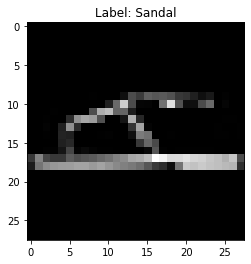

In [4]:
index = random.randrange(1000)
plt.imshow(orig_test[index], cmap='gray')
plt.title('Label: %s' % label_text[int(y_test[index])])
plt.show()

In [0]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
    
x_train, x_test = x_train / 255.0, x_test / 255.0

In [37]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout/2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)              

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.5318 - accuracy: 0.8128 - val_loss: 0.3401 - val_accuracy: 0.8771
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3473 - accuracy: 0.8767 - val_loss: 0.2957 - val_accuracy: 0.8931
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2984 - accuracy: 0.8943 - val_loss: 0.2588 - val_accuracy: 0.9027
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2666 - accuracy: 0.9044 - val_loss: 0.2456 - val_accuracy: 0.9094
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2414 - accuracy: 0.9122 - val_loss: 0.2371 - val_accuracy: 0.9122
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2212 - accuracy: 0.9197 - val_loss: 0.2276 - val_accuracy: 0.9157
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2049 - accuracy: 0.9242 - val_loss: 0.2174 - val_accuracy: 0.9230
Epoch 

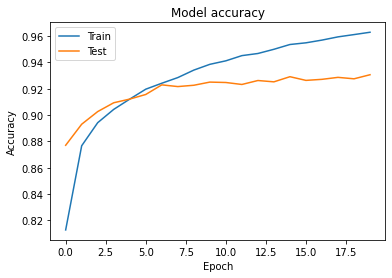

In [38]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train model for a given number of epochs
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

# Evaluate model against test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()